# Diabetes Prediction

## Introduction:

        Diabetes mellitus,most commonly termed as Diabetes,is one of the disease which affects a very large population of human beings. India is referred as "Diabetes Capital of World". Since diabetes has no cure,early diagnosis of diabetes is the most important factor to manage your diabetes and stay healthy.
        According to NIH, "Diabetes is a disease that occurs when your blood glucose, also called blood sugar,is too high.Blood sugar is your main source of energy and comes from the food you eat.Insulin , a harmone made by the pancreas, helps glucose from food get into your cells to be used for energy . Sometimes your body doesn't make enough or any insulin or doesn't use insulin well. Glucose then stays in your blood can cause health problems. Although diabetes has no cure,you can take steps to manage your diabetes and stay healthy.
        In this project the PIMA Indian diabetes dataset analysed is originally from the National Institute of Diabetes and Digestive and Kidney Disease. The diabetes dataset is a binary classification problem where it needs to analyse whether a patient is suffering from the diabetes disease or not on the basis of many available features in the dataset ,all patients here are females at least 21 years old of Pima Indian heritage.
        In this project, various machine learning algorithms are applied to predict diabetes, based on specific attributes and compared their performance measures to choose best classifier.

## Objectives:

*    Predict if person is diabetes patient or not.
*    To analyze the effectiveness of factors affecting on Diabetes.
*    To determine the factors which contribute maximum to persistence of diabetes.
*    To choose best fitted model for prediction of diabetes disease.

In [1]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # to plot charts
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
 #Modeling Libraries
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

In [3]:
df=pd.read_csv("C:\\Users\\dell\\Downloads\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### Data Description:
* The dataset includes data from 768 women with 8 characteristics. In perticular, all patients here are females at least   21 years old of Pima Indian heritage.

*    There are zero values for 'Insulin', 'BloodPressure', 'Glucose', 'SkinThickness', 'BMI', and 'DiabetesPedigreeFunction' so we handle this 0 values by replaces all the zero values in the each column with the corresponding mean value of non-zero values in the corresponding column of DataFrame. This helps to fill in missing values with a reasonable estimate based on the distribution of existing data.

In [4]:
count_zero_insulin = df['Insulin'].eq(0).sum()
print(f'count_zero_insulin={count_zero_insulin}')

count_zero_bp = df['BloodPressure'].eq(0).sum()
print(f'count_zero_bp={count_zero_bp}')

count_zero_glucose = df['Glucose'].eq(0).sum()
print(f'count_zero_glucose={count_zero_glucose}')

count_zero_skinthickness=df['SkinThickness'].eq(0).sum()
print(f'count_zero_skinthickness={count_zero_glucose}')

count_zero_BMI=df['BMI'].eq(0).sum()
print(f'count_zero_BMI={count_zero_BMI}')

count_zero_diabPF=df['DiabetesPedigreeFunction'].eq(0).sum()
print(f'count_zero_diabPF={count_zero_diabPF}')


count_zero_insulin=374
count_zero_bp=35
count_zero_glucose=5
count_zero_skinthickness=5
count_zero_BMI=11
count_zero_diabPF=0


In [5]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
# Correcting missing values in blood pressure
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean()) # There are 35 records with 0 BloodPressure in dataset
# Correcting missing values in BMI
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
# Correct missing values in Insulin and SkinThickness

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


#### describe():
To see the statistical details of the data, the describe() function can be used, which returns the mean, quartile information and maximum and minimum values for each column.

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*  We can see that values vary with different means and standard deviations, some normalization or standardization would be required prior to modeling.
*    Minimum and Maximum values are also different for each feature

In [9]:
### Check for Missing Value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Check for duplicate rows

In [10]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


*  ###### No duplicate value present in the dataset.

#### Count Plot

0    500
1    268
Name: Outcome, dtype: int64


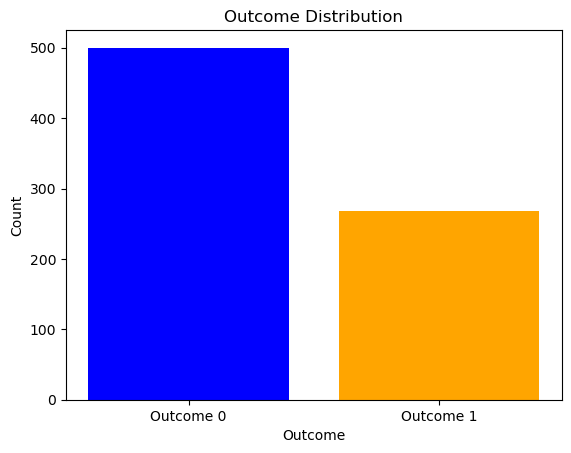

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'class_column' is the name of the column representing the class
Outcome_counts = df['Outcome'].value_counts()

# Display the counts
print(Outcome_counts)

# Plot the bar chart
plt.bar(Outcome_counts.index, Outcome_counts.values, color=['blue', 'orange'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Distribution')
plt.xticks(Outcome_counts.index, ['Outcome 0', 'Outcome 1'])
plt.show()


  *  Here, out of total of 768 patients , 500 patients has no diabetes and 268 patients has diabetes.This is not exactly balance dataset.

*    If one of the class is extremely high compared to the other classes present in the dependent variable then it is termed as the class imbalance problem in ML.
*   Which means there is a bias towards the majority class present in the dependent variable.
    Hence, to have a proper prediction diabetes, class imbalance must be rectified. 
*    There is an assumption of even data distribution within classes in ML algorithms. The extensive issue in the class imbalance problem is that the algorithm will not learn the patterns in the minority class as it does not have enough data leading to high misclassification errors for the minority class.

*    SMOTE (Synthetic Minority Over-sampling Technique) is a popular resampling method used to address class imbalance in machine learning datasets.
*     It is particularly useful when dealing with classification problems where one class (the minority class) is significantly under represented compared to the other class(es).

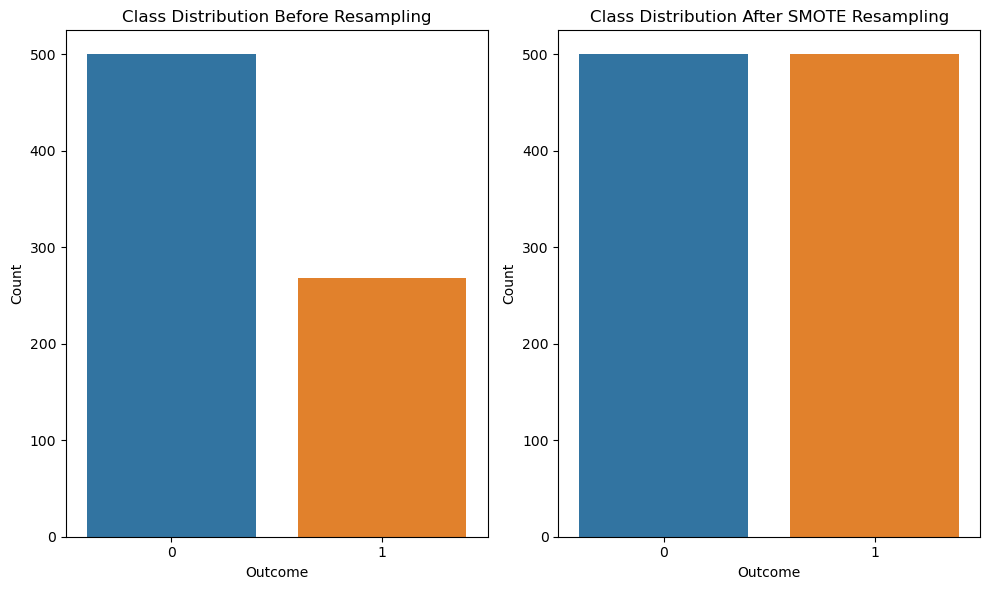

In [12]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load your dataset as 'df'

# Separate features and target variable
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Count the class distribution before resampling
class_distribution_before = y.value_counts()

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the class distribution after resampling
class_distribution_after = y_resampled.value_counts()

# Plot the class distribution before and after resampling
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=class_distribution_before.index, y=class_distribution_before.values)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.barplot(x=class_distribution_after.index, y=class_distribution_after.values)
plt.title('Class Distribution After SMOTE Resampling')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Exploratory Data Analysis

### Heatmap:
* Data visualization tool used to represent the correlation between features in the data.

<AxesSubplot:>

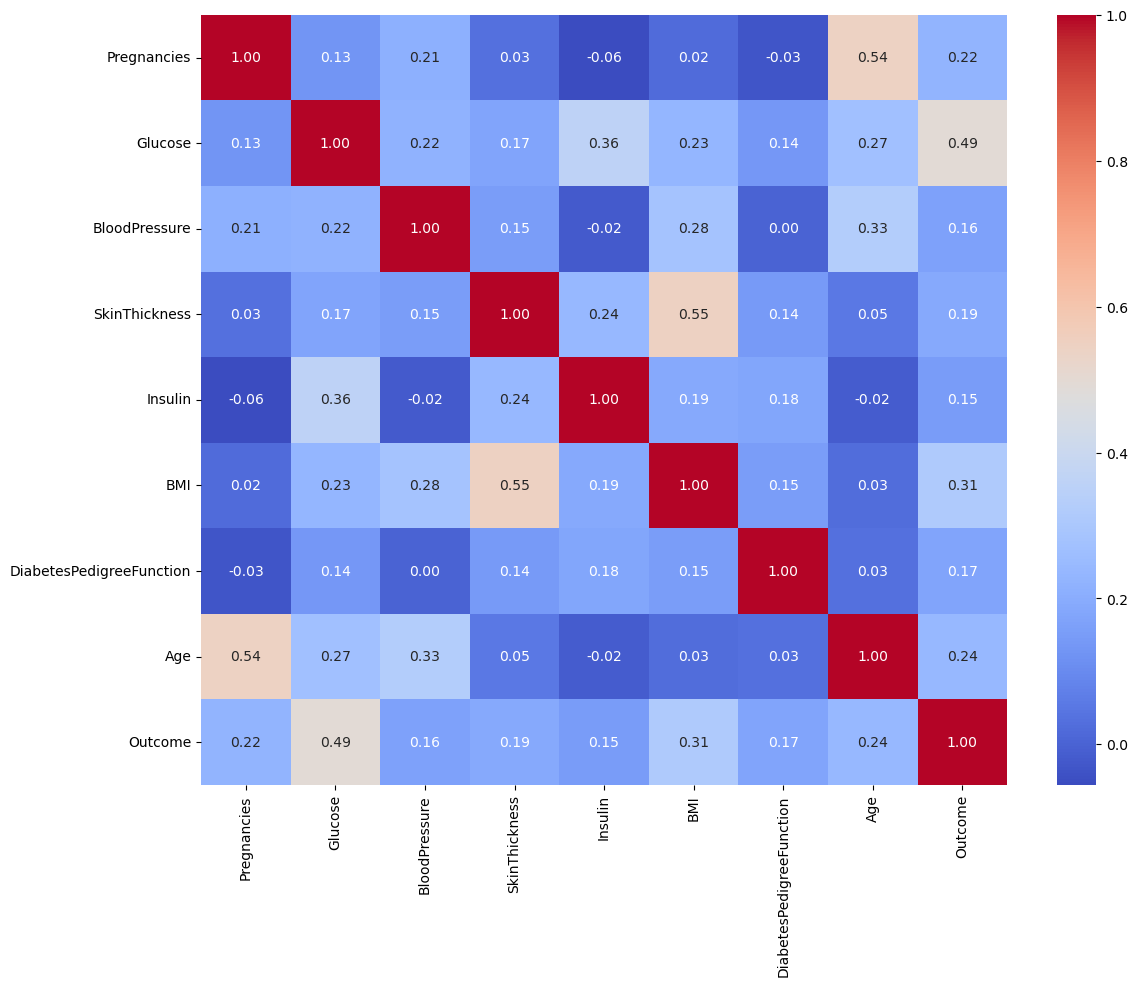

In [13]:
#Correlation
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#### Interpretation:
 *   Correlation between Glucose and Outcome is more than other facotrs.
 *   Correlation between them is 49% that means output majorly depend on the Glucose.
 *   After that BMI,Age, Pregnencies contribute 31%, 24% and 22%.

### Data Visualization for each class
#### Histogram:

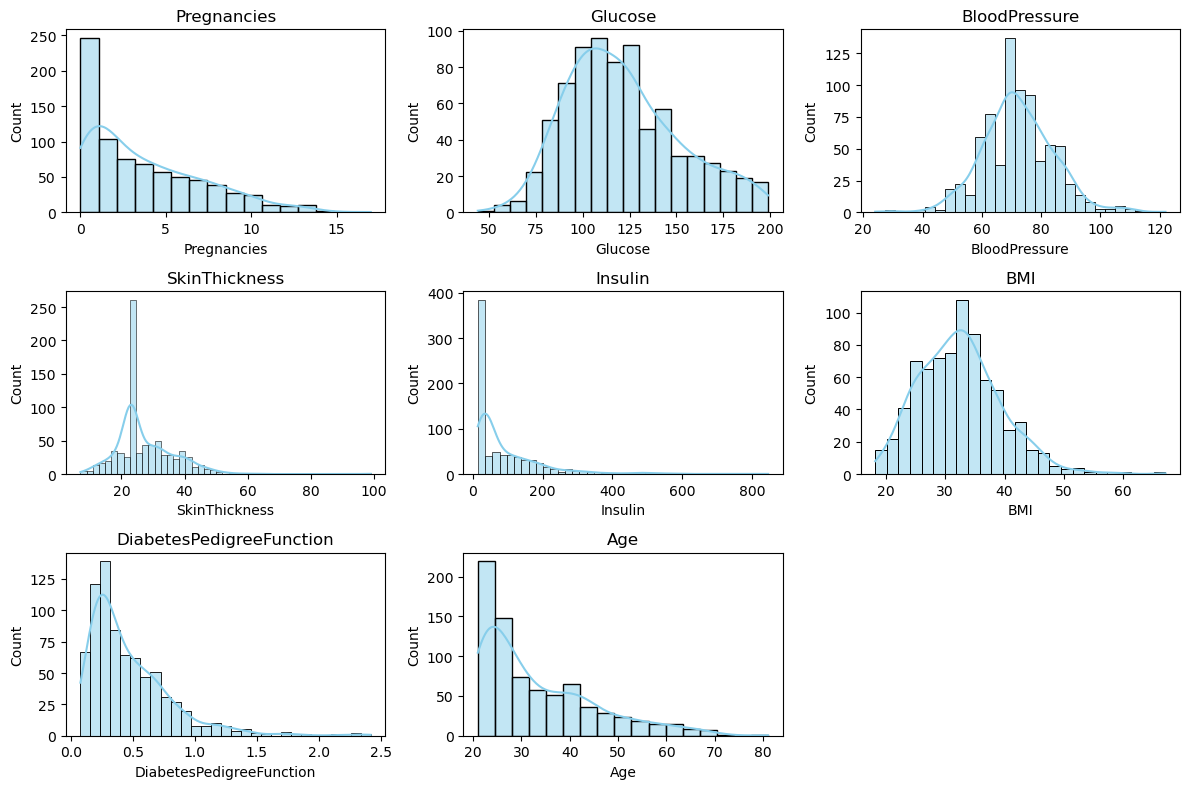

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the diabetes data

# Plot histograms for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude the target variable 'Outcome'
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.show()

* Let’s take a look at the plots. It shows how each feature and label is distributed along different ranges, which further confirms the need for scaling.Our outcome labels have two classes, 0 for no disease and 1 for disease.


### Visualization of Outliers

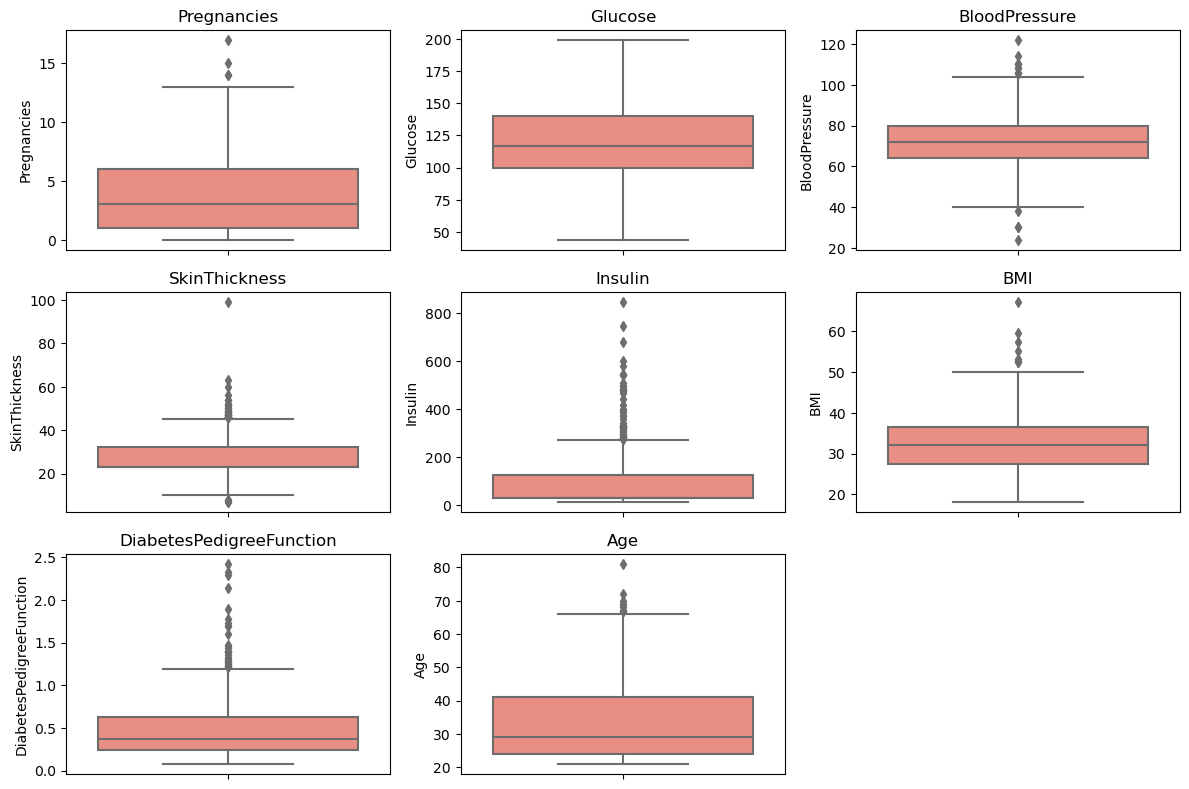

In [15]:
# Plot boxplots for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude the target variable 'Outcome'
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column], color='salmon')
    plt.title(column)
plt.tight_layout()
plt.show()


#### Interpretation:
 * From the box plot for each feature ,we can see outliers are present for each attribute except Glucose.

#### Handling of Outliers:
*    Winsorization is a data preprocessing technique used to handle outliers by capping extreme values at a specified percentile range. 
*      Calculate Percentiles: First, you calculate the percentiles of the dataset. The most commonly used percentiles are the 25th (Q1) and 75th (Q3) percentiles, which represent the lower and upper quartiles, respectively.
*      Calculate Interquartile Range (IQR): The interquartile range (IQR) is the difference between the 75th and 25th percentiles (Q3 - Q1). It measures the spread of the middle 50% of the data.
*     Define Bounds: Based on the IQR, you define lower and upper bounds for Winsorization. These bounds are typically set at a certain multiple (often 1.5 or 3) of the IQR above the 75th percentile and below the 25th percentile.
*      Replace Outliers: Any value below the lower bound is replaced with the value of the lower bound, and any value above the upper bound is replaced with the value of the upper bound. This effectively "clips" or "winsorizes" the extreme values to fall within the specified range.


      
    

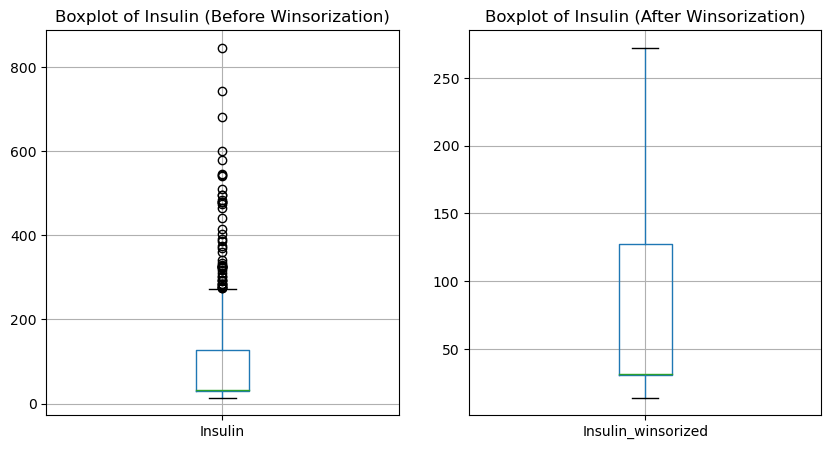

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Example of handling outliers for the 'Insulin' column using Winsorization

# Calculate the 25th and 75th percentiles
q25 = df['Insulin'].quantile(0.25)
q75 = df['Insulin'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q75 - q25

# Define the lower and upper bounds for Winsorization
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

# Winsorize the 'Insulin' column
df['Insulin_winsorized'] = df['Insulin'].clip(lower=lower_bound, upper=upper_bound)

# Visualize the boxplot before and after Winsorization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df[['Insulin']].boxplot()
plt.title('Boxplot of Insulin (Before Winsorization)')
plt.subplot(1, 2, 2)
df[['Insulin_winsorized']].boxplot()
plt.title('Boxplot of Insulin (After Winsorization)')
plt.show()


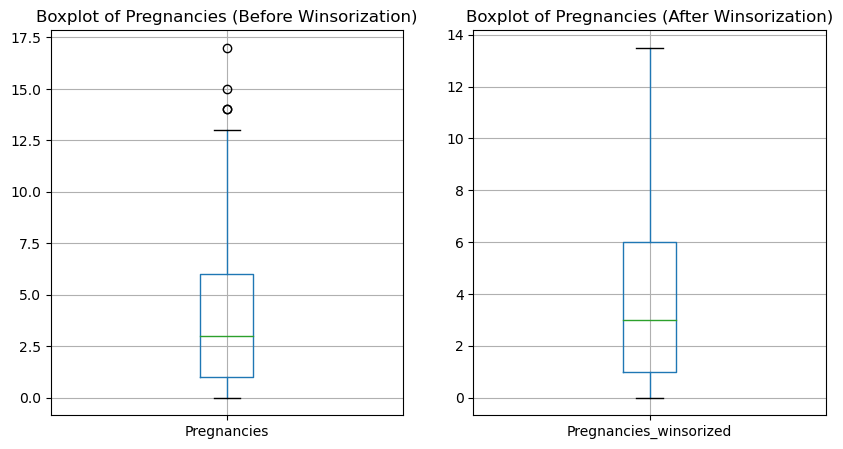

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Example of handling outliers for the 'Pregnancies' column using Winsorization

# Calculate the 25th and 75th percentiles
q25 = df['Pregnancies'].quantile(0.25)
q75 = df['Pregnancies'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q75 - q25

# Define the lower and upper bounds for Winsorization
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

# Winsorize the 'Pregnancies' column
df['Pregnancies_winsorized'] = df['Pregnancies'].clip(lower=lower_bound, upper=upper_bound)

# Visualize the boxplot before and after Winsorization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df[['Pregnancies']].boxplot()
plt.title('Boxplot of Pregnancies (Before Winsorization)')
plt.subplot(1, 2, 2)
df[['Pregnancies_winsorized']].boxplot()
plt.title('Boxplot of Pregnancies (After Winsorization)')
plt.show()


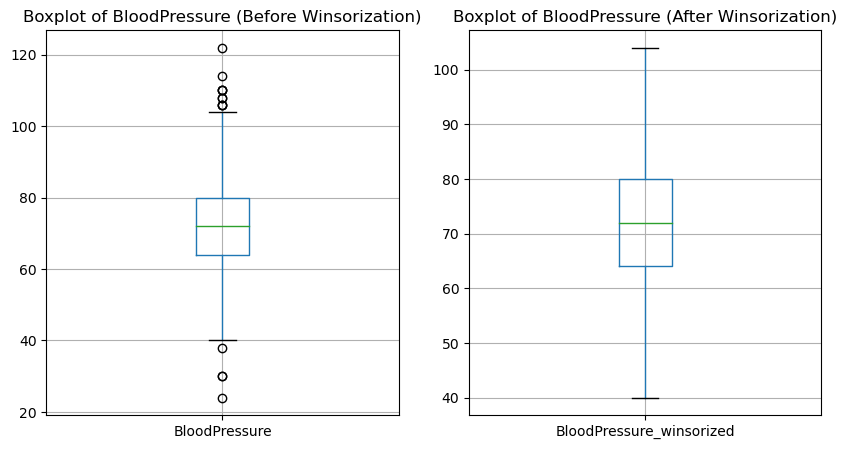

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Example of handling outliers for the 'BloodPressure' column using Winsorization

# Calculate the 25th and 75th percentiles
q25 = df['BloodPressure'].quantile(0.25)
q75 = df['BloodPressure'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q75 - q25

# Define the lower and upper bounds for Winsorization
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

# Winsorize the 'BloodPressure' column
df['BloodPressure_winsorized'] = df['BloodPressure'].clip(lower=lower_bound, upper=upper_bound)

# Visualize the boxplot before and after Winsorization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df[['BloodPressure']].boxplot()
plt.title('Boxplot of BloodPressure (Before Winsorization)')
plt.subplot(1, 2, 2)
df[['BloodPressure_winsorized']].boxplot()
plt.title('Boxplot of BloodPressure (After Winsorization)')
plt.show()


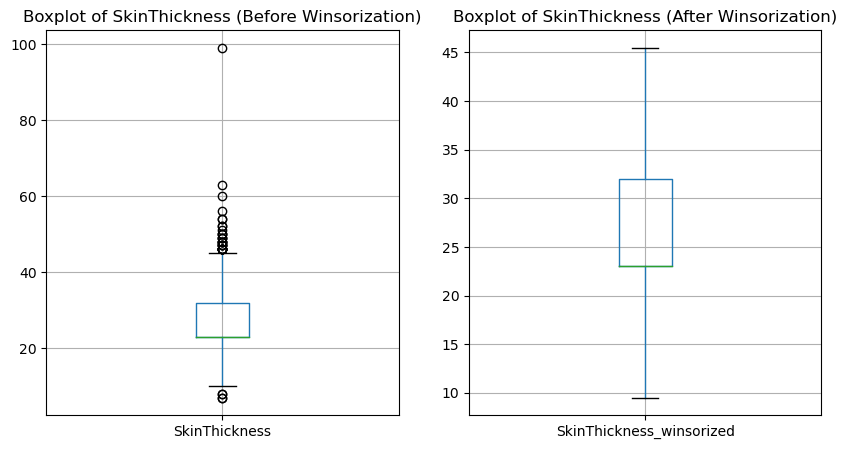

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Calculate the 25th and 75th percentiles
q25 = df['SkinThickness'].quantile(0.25)
q75 = df['SkinThickness'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q75 - q25

# Define the lower and upper bounds for Winsorization
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

# Winsorize the 'SkinThickness' column
df['SkinThickness_winsorized'] = df['SkinThickness'].clip(lower=lower_bound, upper=upper_bound)

# Visualize the boxplot before and after Winsorization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df[['SkinThickness']].boxplot()
plt.title('Boxplot of SkinThickness (Before Winsorization)')
plt.subplot(1, 2, 2)
df[['SkinThickness_winsorized']].boxplot()
plt.title('Boxplot of SkinThickness (After Winsorization)')
plt.show()


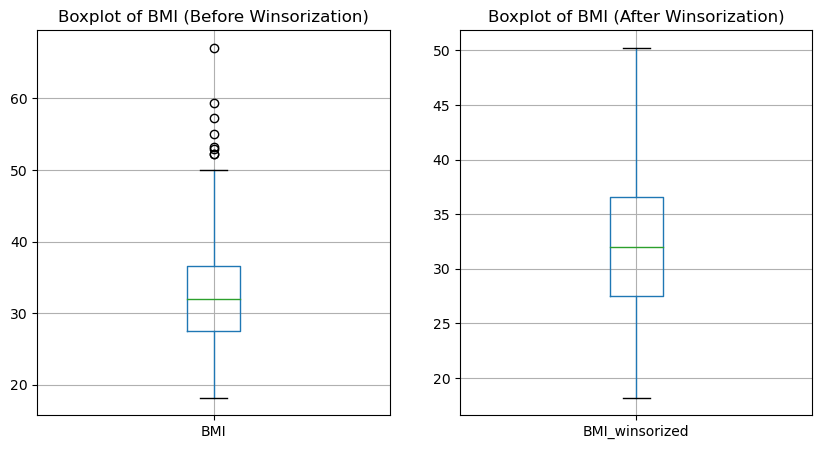

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Calculate the 25th and 75th percentiles
q25 = df['BMI'].quantile(0.25)
q75 = df['BMI'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q75 - q25

# Define the lower and upper bounds for Winsorization
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

# Winsorize the 'BMI' column
df['BMI_winsorized'] = df['BMI'].clip(lower=lower_bound, upper=upper_bound)

# Visualize the boxplot before and after Winsorization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df[['BMI']].boxplot()
plt.title('Boxplot of BMI (Before Winsorization)')
plt.subplot(1, 2, 2)
df[['BMI_winsorized']].boxplot()
plt.title('Boxplot of BMI (After Winsorization)')
plt.show()


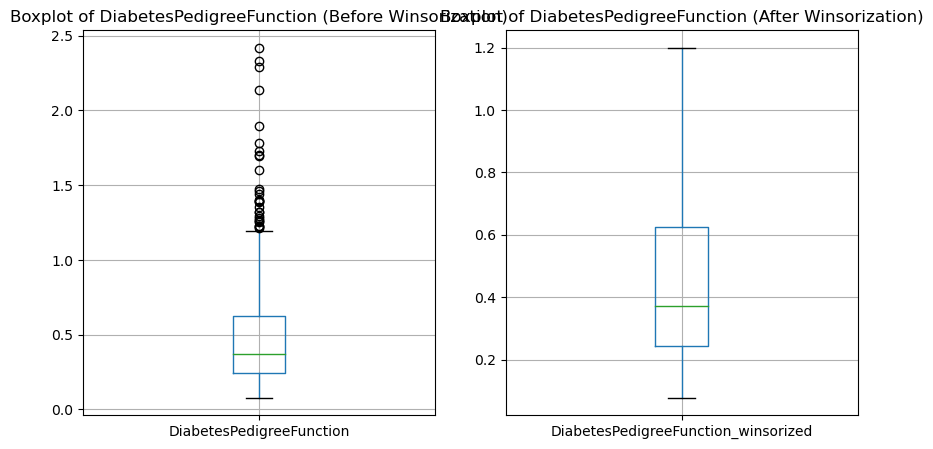

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Calculate the 25th and 75th percentiles
q25 = df['DiabetesPedigreeFunction'].quantile(0.25)
q75 = df['DiabetesPedigreeFunction'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q75 - q25

# Define the lower and upper bounds for Winsorization
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

# Winsorize the 'DiabetesPedigreeFunction' column
df['DiabetesPedigreeFunction_winsorized'] = df['DiabetesPedigreeFunction'].clip(lower=lower_bound, upper=upper_bound)

# Visualize the boxplot before and after Winsorization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df[['DiabetesPedigreeFunction']].boxplot()
plt.title('Boxplot of DiabetesPedigreeFunction (Before Winsorization)')
plt.subplot(1, 2, 2)
df[['DiabetesPedigreeFunction_winsorized']].boxplot()
plt.title('Boxplot of DiabetesPedigreeFunction (After Winsorization)')
plt.show()


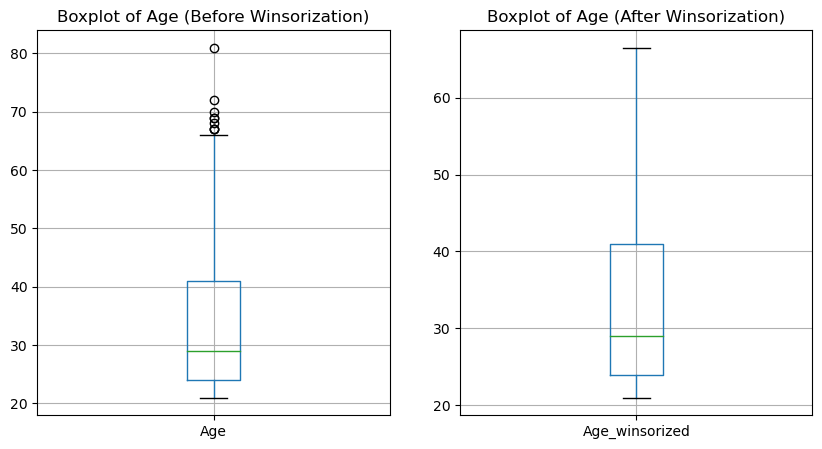

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Calculate the 25th and 75th percentiles
q25 = df['Age'].quantile(0.25)
q75 = df['Age'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q75 - q25

# Define the lower and upper bounds for Winsorization
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

# Winsorize the 'Age' column
df['Age_winsorized'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)

# Visualize the boxplot before and after Winsorization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df[['Age']].boxplot()
plt.title('Boxplot of Age (Before Winsorization)')
plt.subplot(1, 2, 2)
df[['Age_winsorized']].boxplot()
plt.title('Boxplot of Age (After Winsorization)')
plt.show()


In [23]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_winsorized,Pregnancies_winsorized,BloodPressure_winsorized,SkinThickness_winsorized,BMI_winsorized,DiabetesPedigreeFunction_winsorized,Age_winsorized
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1,30.5,6.0,72.0,35.0,33.6,0.627,50.0
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0,30.5,1.0,66.0,29.0,26.6,0.351,31.0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1,30.5,8.0,64.0,23.0,23.3,0.672,32.0
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0,94.0,1.0,66.0,23.0,28.1,0.167,21.0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1,168.0,0.0,40.0,35.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0,180.0,10.0,76.0,45.5,32.9,0.171,63.0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0,30.5,2.0,70.0,27.0,36.8,0.340,27.0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0,112.0,5.0,72.0,23.0,26.2,0.245,30.0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1,30.5,1.0,60.0,23.0,30.1,0.349,47.0


In [24]:
# List of columns to be deleted
columns_to_delete = ['Pregnancies_winsorized', 'Insulin_winsorized', 'Insulin_winsorized', 
                     'Insulin_winsorized', 'BloodPressure_winsorized', 'SkinThickness_winsorized', 
                     'BMI_winsorized', 'DiabetesPedigreeFunction_winsorized', 'Age_winsorized']

# Drop the specified columns from the DataFrame
df = df.drop(columns_to_delete, axis=1)

# Display the modified DataFrame
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0             35     30.5  33.6   
1            1     85.0           66.0             29     30.5  26.6   
2            8    183.0           64.0             23     30.5  23.3   
3            1     89.0           66.0             23     94.0  28.1   
4            0    137.0           40.0             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [25]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


# Model Building and Evaluation
*    Accuracy:The overall accuracy indicating that it correctly predicts the class labels for instances.
*    Precision: Precision measures the accuracy of positive predictions made by the classifier. 
*    Recall: Recall, also known as sensitivity, measures the ability of the classifier to correctly identify the positive instances.
*    F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall.
*    Support: Support is the number of actual occurrences of each class in the test set.

#### Splitting Data: 
*  The balanced dataset (X_resampled, y_resampled) is split into training and testing sets using the train_test_split function from scikit-learn. This is done to evaluate the model's performance on unseen data.

### 1) Using Holdout method:
* It involves splitting the available dataset into two subsets: the training set and the test set.

In [26]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into train and test sets (holdout method) from the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logisic Regression 
* This is a supervised learning classification algorithm used to predict the probability of a target variable.
*    It is a type of algorithm used for solving binary classification problems.

In [27]:
# Train and test Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression:")
print("Accuracy:", accuracy_logistic)
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression:
Accuracy: 0.745
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       111
           1       0.68      0.81      0.74        89

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.76      0.74      0.75       200



#### Interpretation:
Precision:
* Precision for class 0 (negative class) is 0.82, indicating that out of all the instances predicted as class 0, 82% were actually class 0.
* Precision for class 1 (positive class) is 0.68, meaning that out of all the instances predicted as class 1, 68% were actually class 1.

Recall:
* Recall for class 0 is 0.69, suggesting that the model correctly identified 69% of all actual class 0 instances.
* Recall for class 1 is 0.81, indicating that the model correctly identified 81% of all actual class 1 instances.

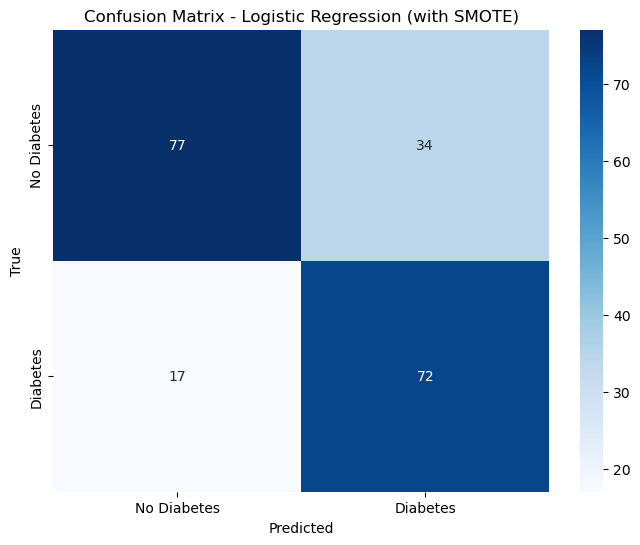

In [28]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Define class labels
class_names = ['No Diabetes', 'Diabetes']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Logistic Regression (with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

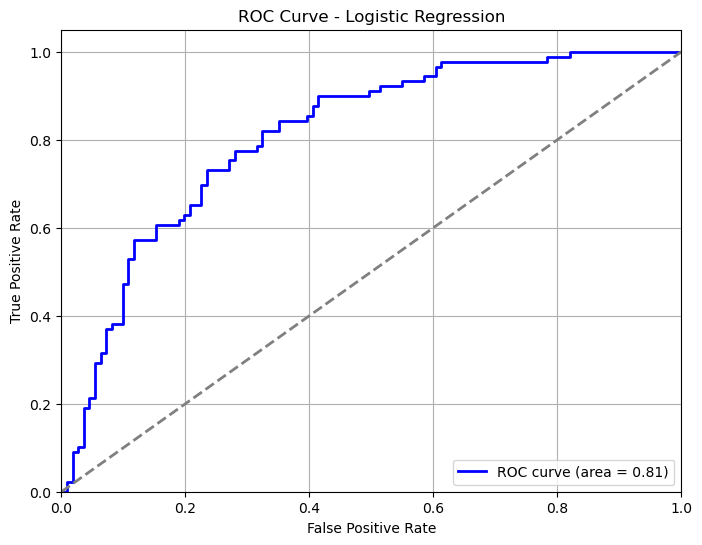

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the Logistic Regression classifier
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#### Interpretation:
* An ROC AUC (Receiver Operating Characteristic Area Under the Curve) score of 0.81 indicates that the logistic regression model is performing well in distinguishing between the positive and negative classes.

### Naive Bayes:

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train and test Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes:
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       111
           1       0.68      0.73      0.71        89

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



#### Interpretation:
Precision:
* Precision for class 0 (negative class) is 0.77, indicating that out of all the instances predicted as class 0, 77% were actually class 0.
* Precision for class 1 (positive class) is 0.68, meaning that out of all the instances predicted as class 1, 68% were actually class 1.

Recall:
* Recall for class 0 is 0.73, suggesting that the model correctly identified 73% of all actual class 0 instances.
* Recall for class 1 is 0.73, indicating that the model correctly identified 81% of all actual class 1 instances.

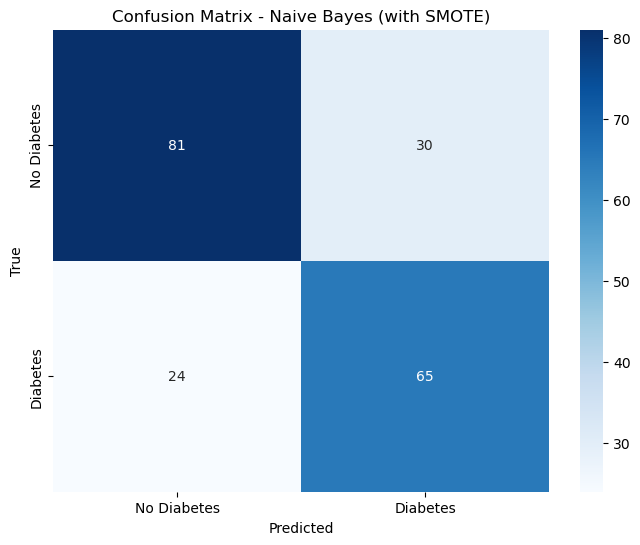

In [31]:
# Calculate confusion matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Define class labels
class_names = ['No Diabetes', 'Diabetes']

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Naive Bayes (with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Interpretation:
The overall accuracy of the Naive Bayes classifier on the test set is 0.73, indicating that it correctly predicts the class labels for approximately 73% of the instances.

### Support Vector Machine:
Support Vector Machine (SVM) is a supervised machine learning algorithm.

In [32]:
# Train and test SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM:")
print("Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))



SVM:
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       111
           1       0.70      0.88      0.78        89

    accuracy                           0.78       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.80      0.78      0.78       200



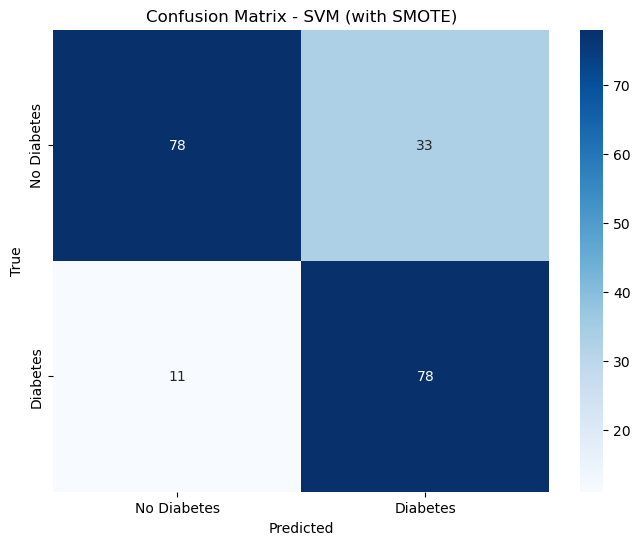

In [33]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Define class labels
class_names = ['No Diabetes', 'Diabetes']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - SVM (with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Interpretation:
*    The overall accuracy of the SVM classifier on the test set is 0.78, indicating that it correctly predicts the class labels for approximately 78% of the instances.
*    Precision: 
*    For class 0 (No Diabetes), the precision is 0.88. This means that out of all instances predicted as having No Diabetes, 88% were actually No Diabetes.
*    For class 1 (Diabetes), the precision is also 0.70. This means that out of all instances predicted as having Diabetes, 78% were actually Diabetes.
*    Recall: 
*    For class 0 (No Diabetes), the recall is 0.70. This means that 70% of the actual instances of No Diabetes were correctly identified by the model.
*    For class 1 (Diabetes), the recall is also 0.88. This means that 88% of the actual instances of Diabetes were correctly identified by the model.

## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train and test KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN:")
print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN:
Accuracy: 0.755
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       111
           1       0.67      0.89      0.76        89

    accuracy                           0.76       200
   macro avg       0.77      0.77      0.75       200
weighted avg       0.79      0.76      0.75       200



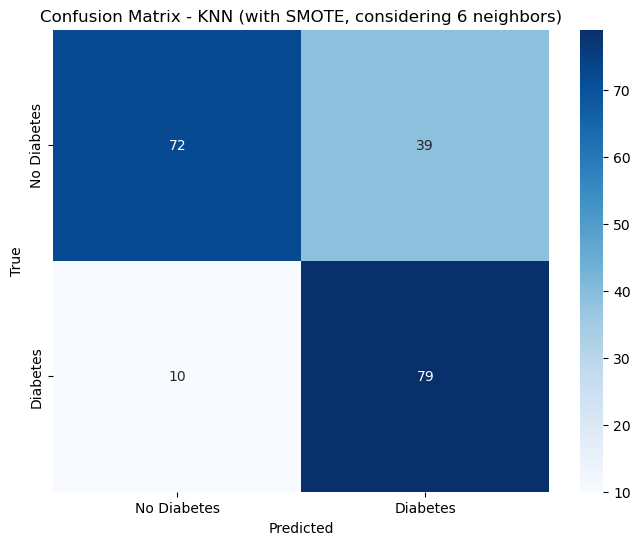

In [35]:
# Calculate confusion matrix for KNN
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Define class labels
class_names = ['No Diabetes', 'Diabetes']

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - KNN (with SMOTE, considering 6 neighbors)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Interpretation:
* The overall accuracy of the knn classifier on the test set is 0.76, indicating that it correctly predicts the class labels for approximately 76% of the instances.
* Precision:
* For class 0 (No Diabetes), the precision is 0.88. This means that out of all instances predicted as having No Diabetes, 88% were actually No Diabetes.
* For class 1 (Diabetes), the precision is also 0.67. This means that out of all instances predicted as having Diabetes, 67% were actually Diabetes.
* Recall:
* For class 0 (No Diabetes), the recall is 0.65. This means that 65% of the actual instances of No Diabetes were correctly identified by the model.
* For class 1 (Diabetes), the recall is also 0.89. This means that 89% of the actual instances of Diabetes were correctly identified by the model.

### Random Forest Classifier:

In [36]:

# Split data into train and test sets (holdout method) from the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

# Train Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Classifier:
Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       111
           1       0.73      0.87      0.79        89

    accuracy                           0.80       200
   macro avg       0.80      0.81      0.80       200
weighted avg       0.81      0.80      0.80       200



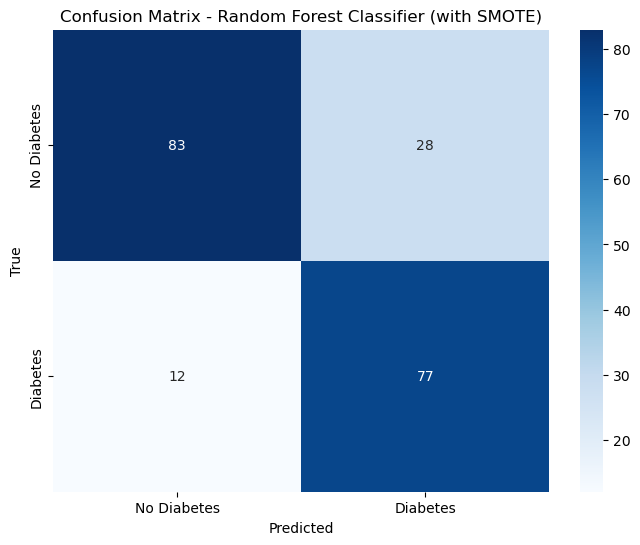

In [37]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Define class labels
class_names = ['No Diabetes', 'Diabetes']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Random Forest Classifier (with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### Interpretation:
* The overall accuracy of the Random Forest classifier on the test set is 0.81, indicating that it correctly predicts the class labels for approximately 81% of the instances.
* Precision:
* For class 0 (No Diabetes), the precision is 0.88. This means that out of all instances predicted as having No Diabetes, 88% were actually No Diabetes.
* For class 1 (Diabetes), the precision is also 0.74. This means that out of all instances predicted as having Diabetes, 74% were actually Diabetes.
* Recall:
* For class 0 (No Diabetes), the recall is 0.76. This means that 76% of the actual instances of No Diabetes were correctly identified by the model.
* For class 1 (Diabetes), the recall is also 0.88. This means that 88% of the actual instances of Diabetes were correctly identified by the model.

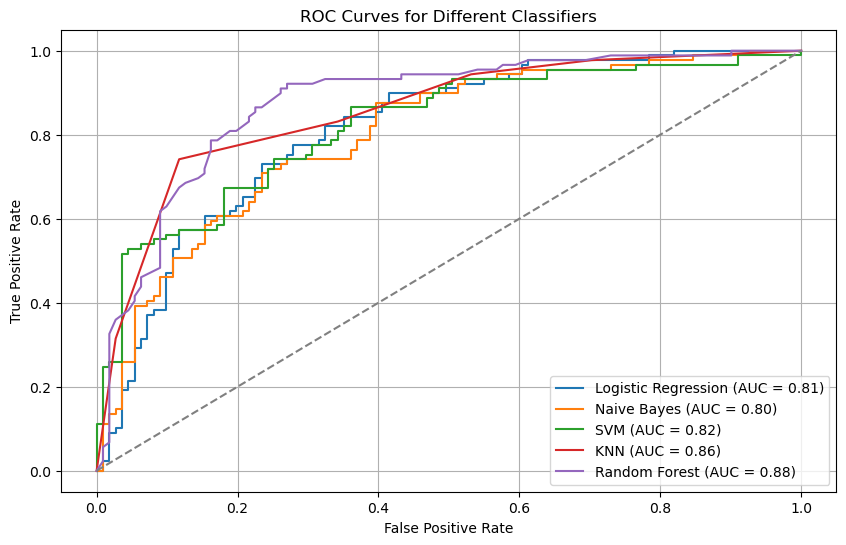

AUC values for each classifier:
1. Logistic Regression: 0.8108
2. Naive Bayes: 0.8000
3. SVM: 0.8209
4. KNN: 0.8553
5. Random Forest: 0.8758


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Initialize lists to store AUC values for each classifier
auc_values = []

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 6))
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Get predicted probabilities for the positive class
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    auc_values.append((name, roc_auc))

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()

# Print AUC values and rank the classifiers
print("AUC values for each classifier:")
for i, (name, auc_score) in enumerate(auc_values, start=1):
    print(f"{i}. {name}: {auc_score:.4f}")


### Interpretation:
  The interpretation of AUC values provides insights into the discriminative power of each classifier, with higher AUC values indicating better performance in distinguishing between the positive and negative classes.
  * for Random Forest classifier (AUC=0.88)

### 2)Using k-fold Cross validation

LogisticRegression Cross-validation scores: [0.6623376623376623, 0.7272727272727273, 0.6753246753246753, 0.8571428571428571, 0.7532467532467533, 0.7402597402597403, 0.8181818181818182, 0.7792207792207793, 0.75, 0.7763157894736842]
Mean CV score: 0.7539302802460697
Standard deviation of CV scores: 0.05906990999837327


GaussianNB Cross-validation scores: [0.6883116883116883, 0.7792207792207793, 0.6753246753246753, 0.8311688311688312, 0.8181818181818182, 0.7142857142857143, 0.8051948051948052, 0.7012987012987013, 0.6710526315789473, 0.7763157894736842]
Mean CV score: 0.7460355434039646
Standard deviation of CV scores: 0.062302735049169534


SVC Cross-validation scores: [0.6493506493506493, 0.7272727272727273, 0.6623376623376623, 0.8311688311688312, 0.7922077922077922, 0.7012987012987013, 0.7792207792207793, 0.6753246753246753, 0.7236842105263158, 0.6842105263157895]
Mean CV score: 0.7226076555023923
Standard deviation of CV scores: 0.06057211297645533


RandomForestClassifier Cross-valid

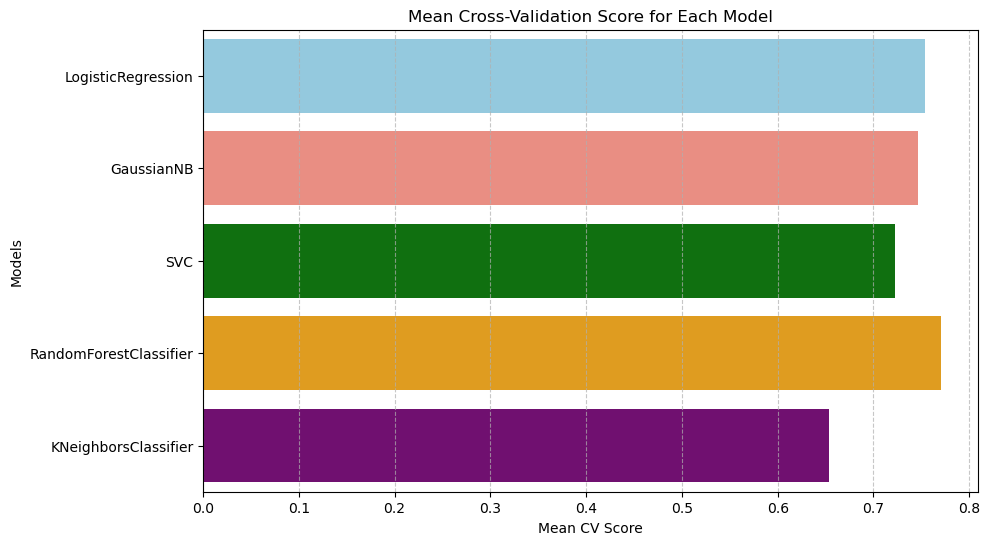

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load your dataset as 'df'

# Define features and target variable
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform cross-validation for each model
results = {}
for model_name, model in models.items():
    cv_scores = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Apply SMOTE to the training data
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        
        # Train the model on resampled data
        model.fit(X_resampled, y_resampled)
        
        # Evaluate the model on the test data
        score = model.score(X_test, y_test)
        cv_scores.append(score)
    
    results[model_name] = cv_scores

    # Print the cross-validation scores for each model
    print(model_name + " Cross-validation scores:", cv_scores)
    print("Mean CV score:", sum(cv_scores) / len(cv_scores))
    print("Standard deviation of CV scores:", pd.Series(cv_scores).std())
    print("\n")

# Convert results to DataFrame
result_df = pd.DataFrame(results)

# Define colors for each model
colors = ['skyblue', 'salmon', 'green', 'orange', 'purple']

# Generate chart
plt.figure(figsize=(10, 6))
sns.barplot(x=result_df.mean(), y=result_df.columns, palette=colors)
plt.xlabel('Mean CV Score')
plt.ylabel('Models')
plt.title('Mean Cross-Validation Score for Each Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [42]:
import pandas as pd

# Create a dictionary with model names, mean CV scores, and standard deviations
model_scores = {
    "LogisticRegression": {"Mean CV score": 0.7539302802460697, "Standard deviation": 0.05906990999837327},
    "GaussianNB": {"Mean CV score":0.7460355434039646, "Standard deviation": 0.062302735049169534 },
    "SVC": {"Mean CV score": 0.7226076555023923, "Standard deviation": 0.06057211297645533},
    "RandomForestClassifier": {"Mean CV score":0.770745044429255, "Standard deviation": 0.04269044287644812},
    "KNeighborsClassifier": {"Mean CV score": 0.6536397812713602, "Standard deviation": 0.6536397812713602}
}

# Convert dictionary to DataFrame
score = pd.DataFrame(model_scores)

from IPython.display import display

# Display the DataFrame as a table
display(score)


,LogisticRegression,GaussianNB,SVC,RandomForestClassifier,KNeighborsClassifier
Mean CV score,0.75393,0.746036,0.722608,0.770745,0.65364
Standard deviation,0.05907,0.062303,0.060572,0.042690,0.65364


*    As per above observation, I found that 10-fold avg. accuracy score for Random Forest classifier is 77% which is higher than other models.
*    So, Random Forest Classifier is the best fitted model for prediction of Diabetes disease.

### Feature importance using Random Forest Classifier
Feature importance predicts that which predictor is most important for predicting the response variable. It draws a comaparative graph of importance between all the predictors used in determining the response variable. The most important predictor will be assigned the highest number and the least important will be assigned the lowest number.

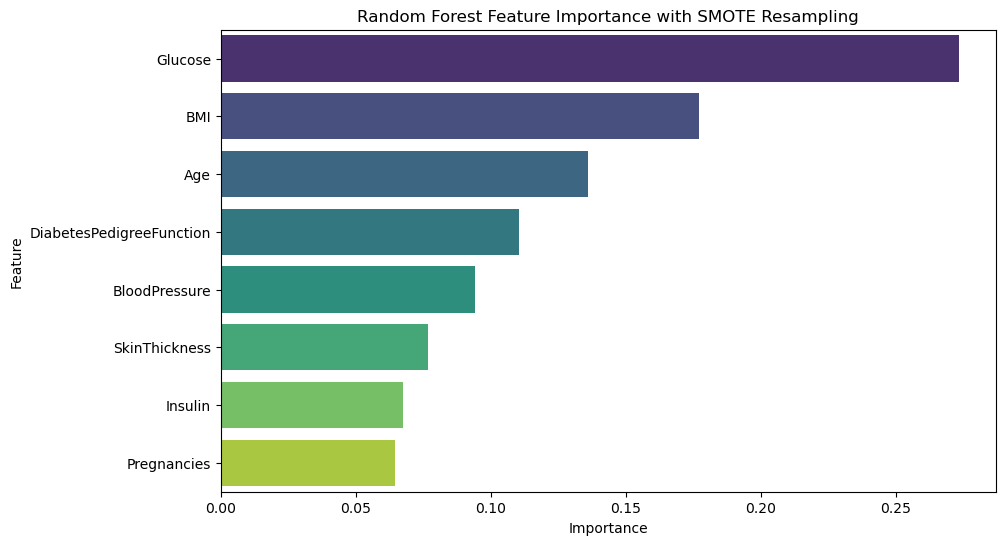

In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Assuming 'Outcome' is your target variable
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Random Forest Feature Importance with SMOTE Resampling')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



 *   Glucose is most important feature for predicting Diabetes.

# Conclusion:

*    Using holdout Method Logistic Regression, Random Forest, KNN, SVM and Naive Bayes has good testing accuracy . And for Random Forest has highest accuracy between them.
*    Using 10-Fold Cross validation, Random Forest provides highest 10-Fold average accuracy score and less standard deviation therefore it is best fitted model for prediction of diabetes disease.
*    Variable Glucose is most important variable in diabetes prediction using Random Forest Classifier.
*    Diabetes is one of the risks during Pregnancy. It has to be treat to avoid complications.

#### References:
    1) International Journal of Scientific Research in Computer Science, Engineering and Information Technology Peer reviewed and Refereed International Scientific Research Journal. Diabetes Prediction Using Machine Learning
    2) Diabetes Prediction Using Machine Learning Analytics
    Conference Paper · May 2022
    DOI: 10.1109/COM-IT-CON54601.2022.9850922